### Load in

In [2]:
%load_ext autoreload 
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import pandorasim as ps
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.time import Time
from tqdm import tqdm
from pandorasim.utils import plot_nirda_integrations

### Define Functions

In [16]:
def find_brightest_indices(cat):
    
    # Convert the filtered DataFrame column to a dictionary
    arr = cat['jmag']
    indices = arr.to_dict()
    
    # Sort the dictionary based on values (numbers) and get the first 20 elements
    # NOTE: list out more if you need more targets
    sorted_indices = sorted(indices, key=lambda x: indices[x])[:100] 
    
    good=[]
    for i in range(len(sorted_indices)):
        if cat['ruwe'][i] < 1.2 and cat['jmag'][i] < 15.:
            good.append(sorted_indices[i]) 
    
    return good

# Define Target 

In [50]:
# temp target
target = ps.Target.from_gaia("GJ 436")

### Set Observation Parameters / Field
ra = target.ra
dec = target.dec
theta = 0*u.deg
duration = (40/60)*u.minute
obstime = Time(target.planets['b']['pl_tranmid'].value - (duration/2).to(u.day).value, format='jd')

### Initialize Observatory and Point
p = ps.PandoraSim(ra=ra, dec=dec, theta=theta, duration=duration, obstime=obstime)

### Set up Sky Catalog
cat = p.SkyCatalog

In [51]:
### Find additional targets
brightest = find_brightest_indices(cat)
print("Indices of the brightest stars in frame:", brightest)

Indices of the brightest stars in frame: [0, 169, 92, 9, 45, 157, 20, 128, 13, 74, 178, 133, 117, 114, 140, 184, 162, 138, 183, 80, 179, 86, 145, 1, 115, 173, 143, 87, 83, 144, 73, 57, 35, 21, 166, 76, 52, 5, 136, 150, 11, 120]


In [52]:
### Pick additional targets & print out their info
# NOTE: for now, selecting 3 targets, but we can select more

print('Primary Target')
print('j magnitude:', target.jmag)

target2 = 88
print('.')
print('.')
print('Target 2')
print('J magnitude:', cat['jmag'][target2])

target3 = 161
print('.')
print('.')
print('Target 3')
print('J magnitude:', cat['jmag'][target3])

Primary Target
j magnitude: 6.9
.
.
Target 2
J magnitude: 13.522000312805176
.
.
Target 3
J magnitude: 16.839000701904297


# Observation

In [53]:
### Set up VIS observation
visda = p.VISDA

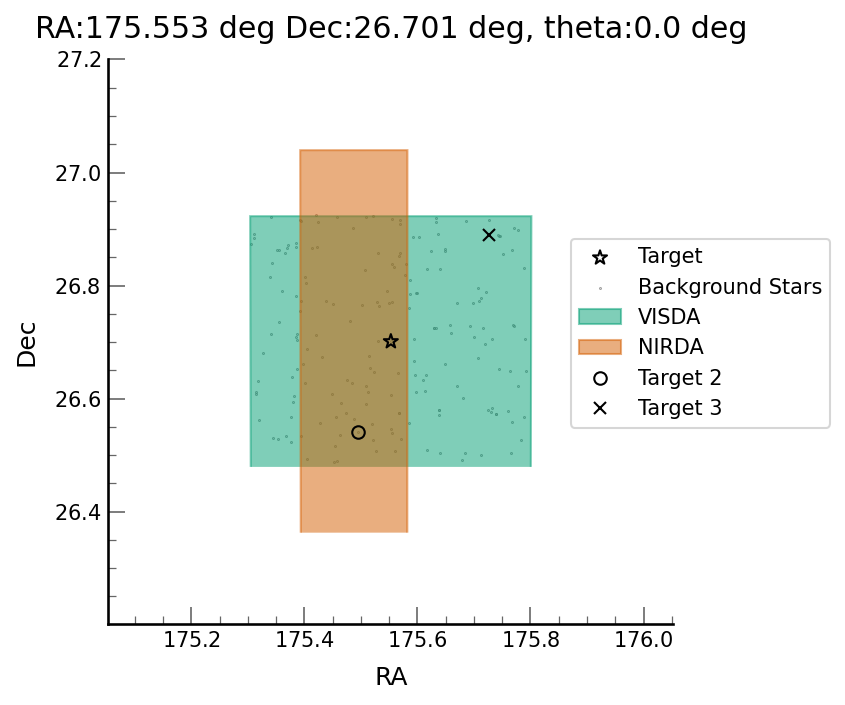

In [54]:
### Map target on expected location on detector
fig = p.plot_footprint();

### Plot additional targets
plt.plot(cat['ra'][target2], cat['dec'][target2], 'o', label='Target 2', markerfacecolor='none', markeredgecolor='black')
plt.plot(cat['ra'][target3], cat['dec'][target3], 'x', label='Target 3', markerfacecolor='none', markeredgecolor='black')

### other plotting things
plt.legend(bbox_to_anchor=(0.8, 0.7))

# NOTE: this is showing the full VISDA, and a subarray of NIRDA (I think). We don't need NIRDA for this. 

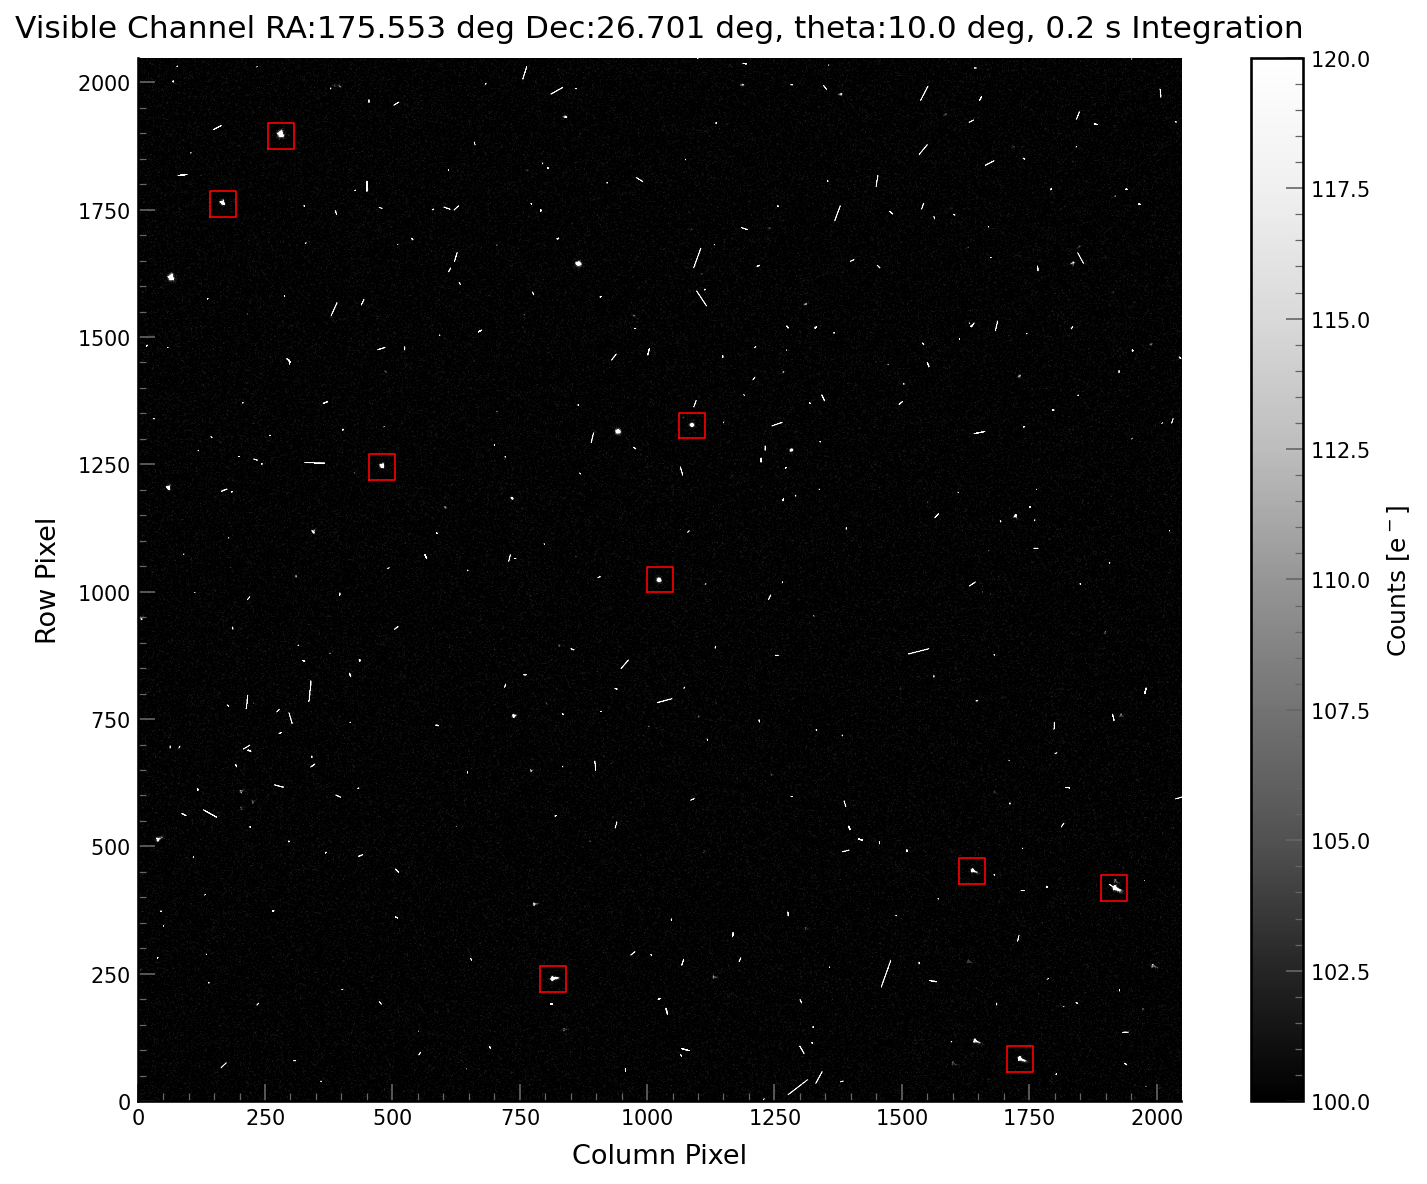

In [7]:
# NOTE: will be able to specify the targets for this function eventually 

p.plot_FFI(nreads=1, include_noise=True, include_cosmics=True, subarrays=True);

In [8]:
### Produce Simulated Output file

# level one fits file should come out of the simulator eventually. - In progress

### Obs Date Volume

In [42]:
### One observation, <1 minute observation, full VISDA array, no NIRDA

data_rate             = 5 #Mbps
VIS_xpix              = 2048
VIS_ypix              = 2048
regions               = 1
bits_per_pix          = 32
frame_time            = 0.2 #sec
stored_frames_per_int = 1
frames_per_int        = 1
num_int               = 200
compression_fractor   = 3
int_and_reset_time    = frame_time * frames_per_int
bits_per_int          = VIS_xpix * VIS_ypix * regions * bits_per_pix * stored_frames_per_int
bits_per_sec          = bits_per_int / int_and_reset_time
test_time             = num_int * int_and_reset_time
bits_per_sec_comp     = bits_per_sec / compression_fractor
bits_test_total       = bits_per_sec_comp * test_time
Gbits_test_packet     = bits_test_total / 1E9 * 1.1 * 1.25
downlinks             = Gbits_test_packet * 1E9 / (data_rate * 1E6) /60 /8# assuming 8 min passes

print('test time:', test_time, 'seconds')
print(Gbits_test_packet, 'Gbits')
print(downlinks, 'downlinks')

test time: 40.0 seconds
12.303291733333335 Gbits
5.126371555555556 downlinks


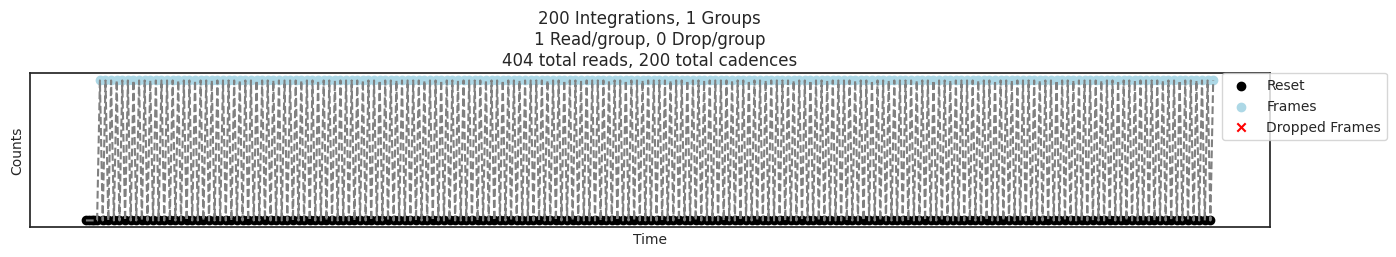

In [43]:
### Plot integration scheme
SC_Resets1 = 5
SC_Resets2 = 1
SC_DropFrames1 = 0
SC_DropFrames2 = 0
SC_DropFrames3 = 0
SC_ReadFrames = stored_frames_per_int
SC_Groups = 1
SC_Integrations = num_int

plot_nirda_integrations( ### what about VISDA?
    SC_Resets1,
    SC_Resets2,
    SC_DropFrames1,
    SC_DropFrames2,
    SC_DropFrames3,
    SC_ReadFrames,
    SC_Groups,
    SC_Integrations,
);

# Data Products

### B2:  Generate a table that provides the mapping between the sky and detector positions to quantify field distortions

### B3:  Generate a table that provides the mapping between the sky and detector positions to quantify boresight alignment

In [67]:
### Compare simulated sky catalogue to real output (or simulated, for now)
# loc (-1,-1) is bottom left corner; loc(0,0) is center; loc (1,1) is top right

### For full catalog:
#cat 


### For our three targets only:
print('Primary Target')
print('coordinates (ra, dec):', target.ra, ', ', target.dec)
print('expected location on detector: 0, 0')
print('.')
print('.')
print('.')

print('Target 2')
print('coordinates (ra, dec):', cat['ra'][target2], ', ', cat['dec'][target2])
### calculate location on detector
loc_ra_2 = (cat['ra'][target2] - target.ra.value )/(0.47/2) #0.47 is dec/ra deg coverage of VISDA (estimate)
loc_dec_2 = (cat['dec'][target2] - target.dec.value)/(0.47/2) #0.47 is dec/ra deg coverage of VISDA (estimate)
print('expected location on detector:', loc_ra_2, ', ', loc_dec_2) 
print('.')
print('.')
print('.')

print('Target 3')
print('coordinates (ra, dec):', cat['ra'][target3], ', ', cat['dec'][target3])
### calculate location on detector
#loc (-1,-1) is bottom left corner; loc (1,1) is top right
loc_ra_3 = (cat['ra'][target3] - target.ra.value )/(0.47/2) #0.47 is dec/ra deg coverage of VISDA (estimate)
loc_dec_3 = (cat['dec'][target3] - target.dec.value)/(0.47/2) #0.47 is dec/ra deg coverage of VISDA (estimate)
print('expected location on detector:', loc_ra_3, ', ', loc_dec_3) 


Primary Target
coordinates (ra, dec): 175.55295207948845 deg ,  26.70110536983035 deg
expected location on detector: 0, 0
.
.
.
Target 2
coordinates (ra, dec): 175.49488159527203 ,  26.54057461489283
expected location on detector: -0.24710844347410746 ,  -0.6831095954788166
.
.
.
Target 3
coordinates (ra, dec): 175.72575702711563 ,  26.88924930011788
expected location on detector: 0.735340202668872 ,  0.8006124693086264
